In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df1=pd.DataFrame(np.random.rand(6,5),columns=list('abcdf'))
df1

,a,b,c,d,f
0,0.874341,0.714894,0.239894,0.303519,0.088074
1,0.743532,0.150198,0.267184,0.690436,0.245504
2,0.741551,0.266268,0.970660,0.842890,0.814181
3,0.466497,0.760945,0.560069,0.202495,0.162911
4,0.663385,0.460105,0.201470,0.663109,0.511909
5,0.700317,0.768014,0.287258,0.076323,0.334935


In [8]:
def best_offer3(x,y,z,delta):
    list1=[]
    list1.append(x)
    list1.append(y)
    list1.append(z)
    return list1   

def best_offer4(x,y,z,delta):
    
    max_elem=np.max(best_offer3(x,y,z,delta))
    index_max_elem=best_offer3(x,y,z,delta).index(max_elem)
    t=best_offer3(x,y,z,delta)
    t.remove(max_elem)
    second_max_elem=np.max(t)
    index_second_max_elem=best_offer3(x,y,z,delta).index(second_max_elem)
    if max_elem-second_max_elem>delta:
        
        a = ((index_max_elem==0 and 'a') or 
         (index_max_elem==1 and 'b') or 
         (index_max_elem==2 and 'c')
        )
    else:
        a='random'
    
    return a
    
def best_offer5(delta):
    r=df1[['a','b','c']].apply(lambda x:best_offer4(x['a'],x['b'],x['c'],delta),axis=1)
    r1=r.tolist().count('a')
    r2=r.tolist().count('b')
    r3=r.tolist().count('c')
    r4=r.tolist().count('random')
    return r1,r2,r3,r4
    

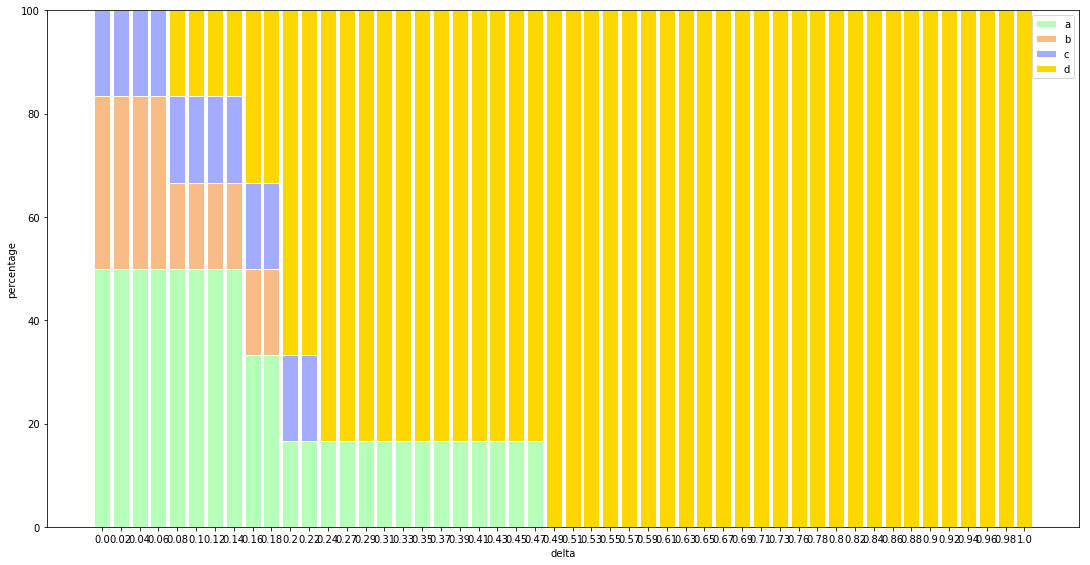

Wall time: 1.97 s


In [12]:
%%time
bins=50
list2=[]
for i in np.linspace(0,1,bins):
    list2.append(best_offer5(i))

a=[x[0] for x in list2]
b=[x[1] for x in list2]
c=[x[2] for x in list2]
d=[x[3] for x in list2]
r = np.arange(bins)
raw_data = {'a': a, 'b': b,'c': c,'d': d}
df = pd.DataFrame(raw_data)  

df['totals']=df.sum(axis=1)
percents = df.div(df['totals'], axis=0)
percents=percents.drop('totals', axis=1)*100

fig = plt.gcf()
barWidth = 0.85
plt.bar(r, percents['a'], color='#b5ffb9',edgecolor='white',width=barWidth,label='a')
plt.bar(r, percents['b'], bottom=percents['a'], color='#f9bc86',edgecolor='white', width=barWidth,label='b')
plt.bar(r, percents['c'], bottom=percents['a']+percents['b'], color='#a3acff',edgecolor='white', width=barWidth,label='c')
plt.bar(r, percents['d'], bottom=percents['a']+percents['b']+percents['c'], color='gold',edgecolor='white', width=barWidth,label='d')
plt.xticks(r, [round(i/(bins-1),2) for i in range(bins)])
plt.legend()
plt.xlabel('delta')
plt.ylabel('percentage')
fig.set_size_inches(18.5, 9.5, forward=True)
plt.show()